# Project: Investigate a TMDb movie dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we look at the tmdb movie dataset which gives information about the various different parameters of the movies that are relased such as imdb_id,runtime,revenue,cast and many more.
We start of having a look at how the dataframe for the csv file looks like via the pandas library 

Here we perform exploratory data analysis by finding out how much movies profited over the years. 

Whats the average runtime for a movie 

If the parameters of the movie such as popularity and profit correlate to each other if so how strongly or weakly.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
tmdb_df=pd.read_csv('tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


We observe that there are lot of false entries in the budget column and revenue column as for a movie to have a budget or revenue would be illogical.
We observe that are the runtime values for some of the entries 0 so we have to filter them out as well

### General Properties

In [2]:
#drop unnecessary columns
tmdb_df1=tmdb_df.drop(columns=['homepage','cast','director','keywords','overview','imdb_id','genres','vote_count','vote_average','production_companies','budget_adj','revenue_adj'])

In [3]:
#number of entries in the dataframe
row,col=tmdb_df1.shape
print('DataFrame has {} rows and {} columns'.format(row-1,col))

DataFrame has 10865 rows and 9 columns


In [4]:
#null entries in budget field
rows,cols=tmdb_df1[tmdb_df1['budget']==0 ].shape
print('Number of irregularities here are {}'.format(rows-1))
tmdb_df1[tmdb_df1['budget']==0 ].head(5)

Number of irregularities here are 5695


,id,popularity,budget,revenue,original_title,tagline,runtime,release_date,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,The man behind the myth,103,6/19/15,2015
36,339527,3.358321,0,22354572,Solace,"A serial killer who can see your future, a psy...",101,9/3/15,2015
72,284289,2.272044,0,45895,Beyond the Reach,NaN,95,4/17/15,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,NaN,108,6/24/15,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,A Little Friendship Never Killed Anyone.,105,6/12/15,2015


In [5]:
rows,cols=tmdb_df1[tmdb_df1['runtime']==0 ].shape
print('Number of irregularities here are {}'.format(rows-1))
tmdb_df1[tmdb_df1['runtime']==0 ].head(5)

Number of irregularities here are 30


,id,popularity,budget,revenue,original_title,tagline,runtime,release_date,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,NaN,0,12/19/15,2015
334,361931,0.357654,0,0,Ronaldo,Astonishing. Intimate. Definitive.,0,11/9/15,2015
410,339342,0.097514,0,0,Anarchy Parlor,NaN,0,1/1/15,2015
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,NaN,0,10/9/15,2015
486,333653,0.176744,0,0,If There Be Thorns,NaN,0,4/5/15,2015




### Data Cleaning

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#will drop duplicate rows but will keep the first one
tmdb_df1.drop_duplicates(keep = 'first', inplace = True)
rows, col = tmdb_df1.shape
print('We now have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We now have 10864 total entries of movies and 9 columns/features of it.


In [7]:
#deleting null values from the budget or revenue fields
import numpy as np
check_row = ['budget', 'revenue']

tmdb_df1[check_row] = tmdb_df1[check_row].replace(0, np.NaN)

tmdb_df1.dropna(subset = check_row, inplace = True)

rows, col = tmdb_df1.shape
print('After remvoing null values from budget and revenue fields, we now have only {} entries of movies.'.format(rows-1))


After remvoing null values from budget and revenue fields, we now have only 3853 entries of movies.


In [8]:
#to convert entries that have a 0 for runtime to a NaN 
tmdb_df1['runtime']=tmdb_df1['runtime'].replace(0,np.NaN)

In [9]:
#to convert all dates to a uniform format 
tmdb_df1.release_date=pd.to_datetime(tmdb_df1['release_date'])
tmdb_df1.head(5)

,id,popularity,budget,revenue,original_title,tagline,runtime,release_date,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,The park is open.,124,2015-06-09,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,What a Lovely Day.,120,2015-05-13,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,One Choice Can Destroy You,119,2015-03-18,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Every generation has a story.,136,2015-12-15,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vengeance Hits Home,137,2015-04-01,2015


In [10]:
tmdb_df1.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
tagline                   object
runtime                    int64
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
#converting budget and revenue feilds to int data type
cols=['budget','revenue']
tmdb_df1[cols]=tmdb_df1[cols].applymap(np.int64)
tmdb_df1.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
tagline                   object
runtime                    int64
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
Calculating which movies made the most and least profit out of the dataframe


In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tmdb_df1.insert(3,'Profit',tmdb_df1['revenue']-tmdb_df1['budget'])

In [13]:
tmdb_df1[['Profit']]=tmdb_df1[['Profit']].applymap(np.int64)
tmdb_df1

,id,popularity,budget,Profit,revenue,original_title,tagline,runtime,release_date,release_year
0,135397,32.985763,150000000,1363528810,1513528810,Jurassic World,The park is open.,124,2015-06-09,2015
1,76341,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,What a Lovely Day.,120,2015-05-13,2015
2,262500,13.112507,110000000,185238201,295238201,Insurgent,One Choice Can Destroy You,119,2015-03-18,2015
3,140607,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Every generation has a story.,136,2015-12-15,2015
4,168259,9.335014,190000000,1316249360,1506249360,Furious 7,Vengeance Hits Home,137,2015-04-01,2015
5,281957,9.110700,135000000,397950503,532950503,The Revenant,"(n. One who has returned, as if from the dead.)",156,2015-12-25,2015
6,87101,8.654359,155000000,285603537,440603537,Terminator Genisys,Reset the future,125,2015-06-23,2015
7,286217,7.667400,108000000,487380321,595380321,The Martian,Bring Him Home,141,2015-09-30,2015
8,211672,7.404165,74000000,1082730962,1156730962,Minions,"Before Gru, they had a history of bad bosses",91,2015-06-17,2015
9,150540,6.326804,175000000,678708609,853708609,Inside Out,Meet the little voices inside your head.,94,2015-06-09,2015


In [14]:
def min_and_max(column_name):
    maximum=tmdb_df1[column_name].idxmax()
    max_vals=pd.DataFrame(tmdb_df1.loc[maximum])
    
    minimum=tmdb_df1[column_name].idxmin()
    min_vals=pd.DataFrame(tmdb_df1.loc[minimum])
    
    return(pd.concat([max_vals,min_vals],axis=1))
min_and_max('Profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
Profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
profit=tmdb_df1.groupby('release_year').sum()
plt.title('        Profits vs Budgets vs Revenue for each year',fontsize=16)
plt.xlabel('Year',fontsize=15)
plt.ylabel('In dollars',fontsize=15)
plt.plot(profit['Profit'],color='red',label='Profits')
plt.plot(profit['budget'],color='blue',label='Budget')
plt.plot(profit['revenue'],color='cyan',label='Revenue')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

We observe that the peak for profits and revenue the graph is seen around 2014 and for budget at 2012.
In the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss

### Research Question 2 
Calcualting the minimum and maximum runtime 

In [16]:
#calculate max and min runtime
min_and_max('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
Profit,-17128721,-5
revenue,871279,5
original_title,Carlos,Kid's Story
tagline,The man who hijacked the world,NaN
runtime,338,15
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


In [17]:
#caluculating the average runtime for all movies
avg_runtime=tmdb_df1['runtime'].mean()
avg_runtime

109.22029060716139

(array([2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.600e+01, 6.330e+02,
        1.251e+03, 9.330e+02, 5.480e+02, 2.580e+02, 9.600e+01, 4.400e+01,
        1.900e+01, 1.800e+01, 6.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 15.  ,  27.92,  40.84,  53.76,  66.68,  79.6 ,  92.52, 105.44,
        118.36, 131.28, 144.2 , 157.12, 170.04, 182.96, 195.88, 208.8 ,
        221.72, 234.64, 247.56, 260.48, 273.4 , 286.32, 299.24, 312.16,
        325.08, 338.  ]),
 <a list of 25 Patch objects>)

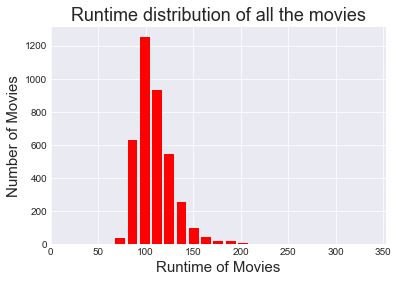

In [18]:

plt.xlabel('Runtime of Movies', fontsize = 15)

plt.ylabel('Number of Movies', fontsize=15)

plt.title('Runtime distribution of all the movies', fontsize=18)

plt.hist(tmdb_df1['runtime'],rwidth=0.8,bins=25,color='red')


The histogram shows us the duration of movies in bins of size 25.The tallest bar here is observed at 100-125 and around 1200 movies have a runtime that fall in this bin size.From the shape we can say its positvely skewed.

### Research Question 3
Calculating correlation between fields of the dataframe and how much they're correlated.

In [19]:
#we see the correlation between the popularity and profit of movies released
tmdb_df1.corr()

,id,popularity,budget,Profit,revenue,runtime,release_year
id,1.000000,0.188878,-0.027449,0.003934,-0.003206,-0.035688,0.489926
popularity,0.188878,1.000000,0.446987,0.596201,0.615535,0.215092,0.173278
budget,-0.027449,0.446987,1.000000,0.526818,0.688556,0.260977,0.268040
Profit,0.003934,0.596201,0.526818,1.000000,0.979133,0.220238,0.087971
revenue,-0.003206,0.615535,0.688556,0.979133,1.000000,0.250298,0.139140
runtime,-0.035688,0.215092,0.260977,0.220238,0.250298,1.000000,-0.112453
release_year,0.489926,0.173278,0.268040,0.087971,0.139140,-0.112453,1.000000


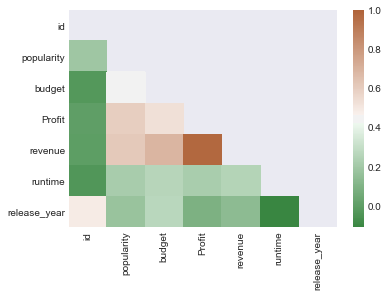

In [20]:
corr=tmdb_df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)#Masking upper triangle of the matrix
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, cmap=sns.diverging_palette(130, 30, as_cmap=True))

We see how strongly a given parameter is correalted to another in the heat map above.
We mask the the upper triangle of the matrix as the lower triangle represent the same values and reduces unneccsary redundancy.

In [21]:
#Correlation between Popularity and Budget
tmdb_df1['popularity'].corr(tmdb_df1['budget'])


0.4469866930400051

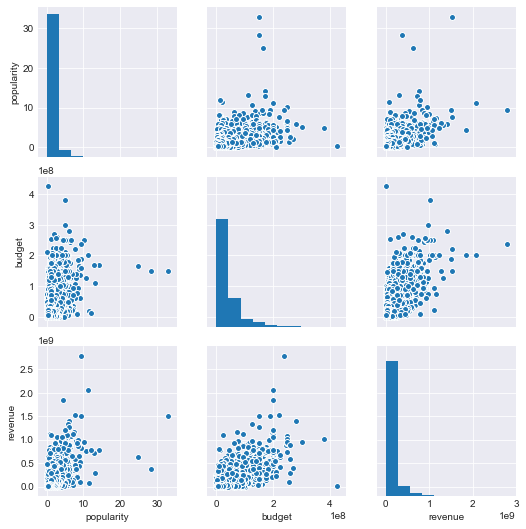

In [22]:
corr1=tmdb_df1[['popularity','budget',"revenue"]]
sns.pairplot(corr1)

Using pairplots we see the output of the heatmap in a scatterplot like form and whether the data is normally distributed or not